In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess image

In [2]:
def load_and_resize_image(url, scale=4):
    path = tf.keras.utils.get_file(url.split("/")[-1], url)       # Download image
    img = Image.open(path).convert("RGB")                         # Convert to RGB
    hr_img = img.resize((128, 128))                               # High-res reference
    lr_img = hr_img.resize((128 // scale, 128 // scale))          # Downscale
    lr_img = lr_img.resize((128, 128))                            # Upscale to original size
    return np.array(lr_img) / 255.0, np.array(hr_img) / 255.0     # Normalize and return both

# Load sample image

In [3]:
img_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
lr_img, hr_img = load_and_resize_image(img_url)

# Convert low-res image to tensor and add batch dimension

In [4]:
lr_tensor = tf.convert_to_tensor(lr_img, dtype=tf.float32)[tf.newaxis, ...]

# Load EDSR model from TensorFlow Hub (scale=4)

In [5]:
edsr = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")     # ESRGAN is similar to EDSR

# Run model to get super-res output

In [6]:
sr_tensor = edsr(lr_tensor)                                       # Super-res output
sr_img = tf.clip_by_value(sr_tensor[0], 0.0, 1.0).numpy()          # Remove batch dim and clip

# Plot results

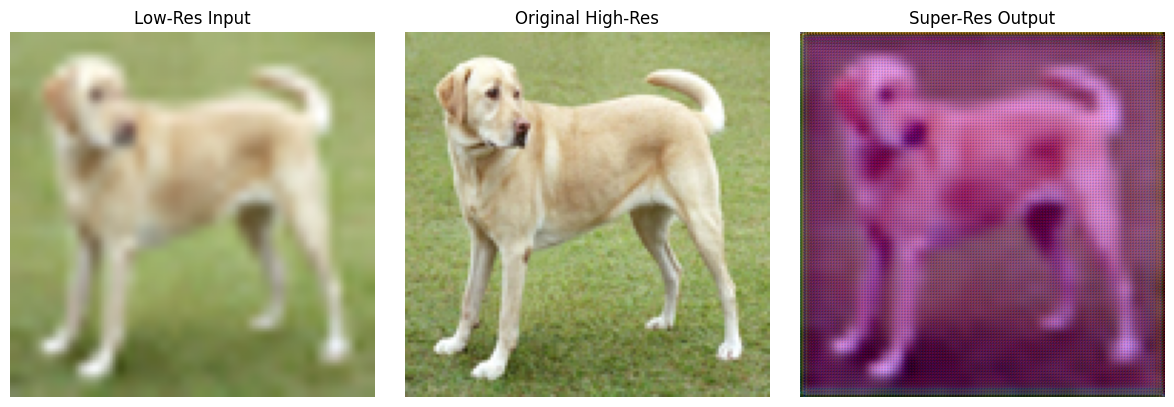

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(lr_img)
plt.title("Low-Res Input")
plt.axis('off')
 
plt.subplot(1, 3, 2)
plt.imshow(hr_img)
plt.title("Original High-Res")
plt.axis('off')
 
plt.subplot(1, 3, 3)
plt.imshow(sr_img)
plt.title("Super-Res Output")
plt.axis('off')
plt.tight_layout()
plt.show()